In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore");

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
#How many orders are there?
orders_df = orders_qu.copy()
num_orders = orders_df['order_id'].nunique()
num_orders

40985

In [ ]:
orderlines_df = orderlines_qu.copy()
num_orderlines = orderlines_df['id_order'].nunique()
num_orderlines

40985

In [ ]:
product_category_df = products_cl.copy()
product_category_df["category"] = ""

In [ ]:
##How should products be classified into different categories to simplify reports and analysis??
product_category_df.loc[product_category_df["type"] == "11865403", "category"] = "phone case/bag/cover"
product_category_df.loc[product_category_df["type"] == "12175397", "category"] = "server"
product_category_df.loc[product_category_df["type"] == "1298", "category"] = "support/stand/docking station" #Although there are too many kinds of products in this type.
product_category_df.loc[product_category_df["type"] == "11935397", "category"] = "HDD"
product_category_df.loc[product_category_df["type"] == "11905404", "category"] = "health monitor"
product_category_df.loc[product_category_df["type"] == "1282", "category"] = "desktop"
product_category_df.loc[product_category_df["type"] == "12635403", "category"] = "iPad case/cover/support"
product_category_df.loc[product_category_df["type"] == "13835403", "category"] = "iPad case/cover/sleeve"
product_category_df.loc[product_category_df["type"] == "5,74E+15", "category"] = "iMac desktop computer 27 inch"
product_category_df.loc[product_category_df["type"] == "1364", "category"] = "RAM"
product_category_df.loc[product_category_df["type"] == "12585395", "category"] = "adapter"
product_category_df.loc[product_category_df["type"] == "1296", "category"] = "monitor"
product_category_df.loc[product_category_df["type"] == "1325", "category"] = "cable"
product_category_df.loc[product_category_df["type"] == "5384", "category"] = "headset/headphones"
product_category_df.loc[product_category_df["type"] == "1433", "category"] = "expansion kit" #Overlaps with the type below.
product_category_df.loc[product_category_df["type"] == "12215397", "category"] = "SSD"
product_category_df.loc[product_category_df["type"] == "5398", "category"] = "speaker"
product_category_df.loc[product_category_df["type"] == "1,02E+12", "category"] = "New MacBook Pro 13/15-inch"
product_category_df.loc[product_category_df["type"] == "1,44E+11", "category"] = "repair service"
product_category_df.loc[product_category_df["type"] == "57445397", "category"] = "memory card/flash drive"
product_category_df.loc[product_category_df["type"] == "1334", "category"] = "WiFi/router"
product_category_df.loc[product_category_df["type"] == "2158", "category"] = "MacBook Pro 13/15-inch" #Overlaps with the type 1,02E+12.
product_category_df.loc[product_category_df["type"] == "2449", "category"] = "iWatch strap"
product_category_df.loc[product_category_df["type"] == "12655397", "category"] = "internal SSD/HDD"
product_category_df.loc[product_category_df["type"] == "12215397", 'category'] = 'SSD'
product_category_df.loc[product_category_df["type"] == "1229", "category"] = "pen/stylus/pointer"
product_category_df.loc[product_category_df["type"] == "12995397", "category"] = "external box"
product_category_df.loc[product_category_df["type"] == "1515", "category"] = "external battery"
product_category_df.loc[product_category_df["type"] == "13615399", "category"] = "(car) charger"
product_category_df.loc[product_category_df["type"] == "13555403", "category"] = "tempered glass/protector for iPhone"
product_category_df.loc[product_category_df["type"] == "1405", "category"] = "graphics tablet"
product_category_df.loc[product_category_df["name"].str.contains("keyboard", case=False) & ~product_category_df["name"].str.contains("Apple Macbook Pro", case=False), "category"] = "Keyboard"
product_category_df.loc[product_category_df["type"] == "1387", "category"] = "mouse"
product_category_df.loc[product_category_df["type"] == "1392", "category"] = "backpack"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += "Apple ipod"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += "Tablet"
product_category_df.loc[product_category_df["name"].str.contains("^Apple iPhone.*GB", case=False) | product_category_df["name"].str.contains(r"\d+GB\s*Apple iPhone", case=False, regex=True),"category"] = "Apple i Phone"

In [ ]:
product_category_df

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,RAM
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,backpack
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,backpack
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,backpack


In [ ]:
product_count = product_category_df["category"].value_counts()
product_category_df.category.head(20)

,category
0,
1,Keyboard
2,mouse
3,
4,RAM
5,
6,RAM
7,RAM
8,RAM
9,cable


In [ ]:
merged_orders = orders_df.merge(orderlines_df, how='inner', left_on='order_id', right_on='id_order')

In [ ]:
# Calculate value counts for the 'category' column
product_count = product_category_df['category'].value_counts()

# Identify categories to exclude (empty and those with counts less than a threshold)
threshold = 50 # You can adjust this threshold as needed
categories_to_exclude = product_count[(product_count < threshold) | (product_count.index == '')].index

# Filter the DataFrame to exclude the identified categories
product_category_df_filtered = product_category_df[~product_category_df['category'].isin(categories_to_exclude)]

product_df = product_category_df_filtered.copy()
product_df
product_df["category"].value_counts()

,count
category,
phone case/bag/cover,1056
server,939
support/stand/docking station,741
HDD,562
health monitor,454
desktop,373
iPad case/cover/sleeve,267
iPad case/cover/support,252
iMac desktop computer 27 inch,247


In [ ]:
num_products = product_df['category'].nunique()
num_products

34

In [ ]:
top_20 = product_df['category'].value_counts().head(20)

In [ ]:
top_20.nunique()

20

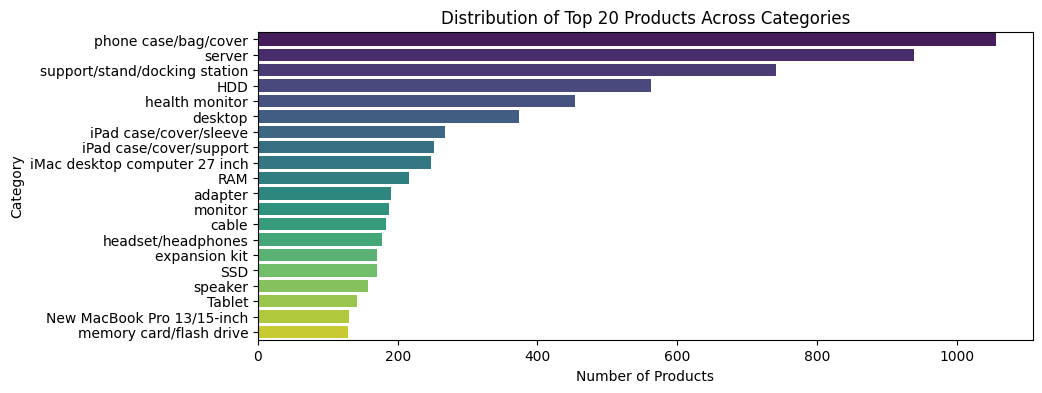

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
product_plot = sns.barplot(x=top_20.values,
              y=top_20.index,
              palette='viridis')
product_plot.set(title="Distribution of Top 20 Products Across Categories", xlabel="Number of Products", ylabel= "Category")
plt.savefig("Top_20_products.png", bbox_inches='tight')

In [ ]:
#from google.colab import files
top_20.savefig("Top_20.png")

In [ ]:
products_orderlines =  product_df.merge(orderlines_df, how = 'inner', on = 'sku')
products_orderlines

,sku,name,desc,price,in_stock,type,category,id,id_order,product_id,product_quantity,unit_price,date
0,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard,1119255,299610,0,1,55.99,2017-01-01 10:52:42
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard,1120547,300254,0,1,55.99,2017-01-02 08:01:14
2,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard,1121337,300553,0,1,55.99,2017-01-02 13:39:48
3,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard,1121676,300711,0,1,55.99,2017-01-02 16:35:08
4,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard,1123679,301636,0,1,55.99,2017-01-03 14:02:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,iPad case/cover/sleeve,1499671,464365,0,1,22.99,2017-12-16 14:38:57
39157,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,iPad case/cover/sleeve,1523146,475426,0,1,19.54,2017-12-28 20:24:02
39158,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,iPad case/cover/sleeve,1559235,490325,0,2,22.99,2018-01-13 23:08:33
39159,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,iPad case/cover/sleeve,1596455,496812,0,1,22.99,2018-02-02 14:23:53


In [ ]:
most_ordered_products = products_orderlines.groupby(['product_id', 'name'])['product_quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
# Group by product_id and name, sum product_quantity, and sort
most_ordered_products = products_orderlines.groupby(['name'])['product_quantity'].sum().sort_values(ascending=False).reset_index()
most_ordered_products

,name,product_quantity
0,AirPods Apple Bluetooth Headset for iPhone iPa...,537
1,EarPods Apple Headphones with Remote and Mic (...,489
2,"Red 4TB WD 35 ""Mac PC hard drive and NAS",476
3,Samsung 850 EVO SSD Disk 500GB,329
4,Crucial MX300 525GB SSD Disk,328
...,...,...
4030,Zepp Golf Golf Amarillo Sensor Kit,1
4031,8/7 NEXT LifeProof iPhone Case Black,1
4032,(Open) Olloclip 4-in-1 lens iPhone 6 / 6S and ...,1
4033,(Open) NewerTech Adapter USB 3.0 to DVI / HDMI...,1


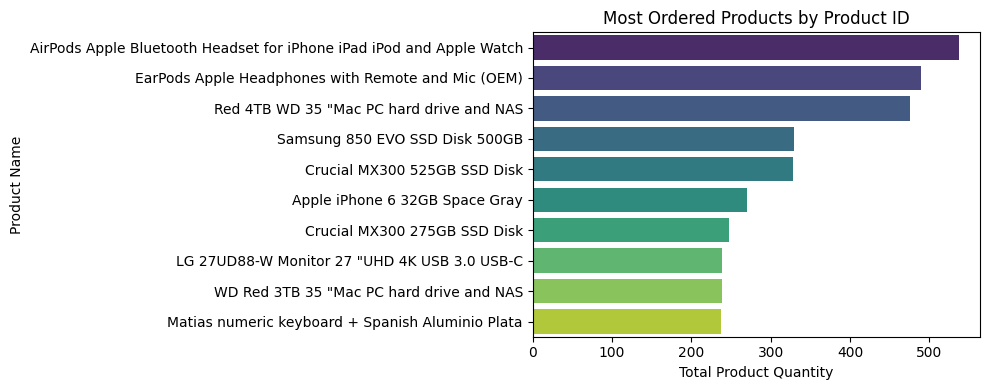

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_most_ordered_products_by_id = most_ordered_products.head(10)

# Create the bar plot
plt.figure(figsize=(10,4))
sns.barplot(x='product_quantity', y='name', data=top_most_ordered_products_by_id, palette='viridis')
plt.title(f'Most Ordered Products by Product ID')
plt.xlabel('Total Product Quantity')
plt.ylabel('Product Name')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.savefig("Most Ordered Products by Product ID.png",bbox_inches='tight');

In [ ]:
products_orderlines['Discount'] = products_orderlines['price'] - products_orderlines['unit_price']

In [ ]:
avg_price_per_category = product_df.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_per_category

,price
category,
iMac desktop computer 27 inch,3525.01
MacBook Pro 13/15-inch,3058.25
New MacBook Pro 13/15-inch,2831.45
desktop,2601.12
server,1203.41
Tablet,793.39
Apple i Phone,775.57
HDD,751.52
monitor,512.68


In [ ]:
top_avg_price_per_category = avg_price_per_category.head(20)

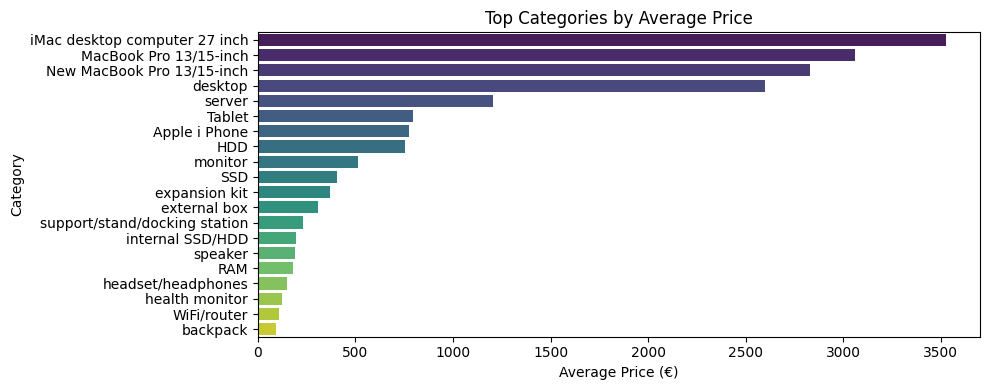

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(x=top_avg_price_per_category.values, y=top_avg_price_per_category.index, palette='viridis')
plt.title(f'Top Categories by Average Price')
plt.xlabel('Average Price (€)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig("Most expensive product categories",bbox_inches = 'tight')

In [ ]:
#What is the time period that the dataset covers?
merged_orders_products = orders_df.merge(products_orderlines, left_on = 'order_id', right_on = 'id_order', how='inner')

In [ ]:
import numpy as np
merged_orders_products['Discount'] = merged_orders_products['price'] - merged_orders_products['unit_price']

# Derive Discount_status
merged_orders_products['Discount_status'] = np.where(merged_orders_products['Discount'] > 0, 'Discounted', 'Non-discounted')


In [ ]:
#merged_orders_products.groupby(['category','Discount_status'])['category'].value_counts()

In [ ]:
# Filter for discounted products
discounted_products_df = merged_orders_products[merged_orders_products['Discount_status'] == 'Discounted']

# Get the number of unique categories with discounted products
num_discounted_categories = discounted_products_df['category'].nunique()

In [ ]:
num_discounted_categories

31

In [ ]:
merged_orders_products['created_date'] = pd.to_datetime(merged_orders_products['created_date'])

In [ ]:
merged_orders_products['date'] = pd.to_datetime(merged_orders_products['date'])

In [ ]:
merged_orders_products["Discount%"] = ((merged_orders_products["Discount"]/merged_orders_products["price"])*100).round(2)
merged_orders_products.loc[merged_orders_products['Discount%'] < 0, 'Discount%'] = 0
merged_orders_products['category'].value_counts()

,count
category,
phone case/bag/cover,4374
HDD,3872
health monitor,3145
RAM,3136
headset/headphones,2319
SSD,1982
Apple i Phone,1869
internal SSD/HDD,1832
adapter,1815


In [ ]:
merged_orders_products_filtered = merged_orders_products[(merged_orders_products['category'] != '') & (merged_orders_products['category'] != 'repair service')].copy()
#merged_orders_products_filtered['category'].value_counts()

In [ ]:
category_discount_count = merged_orders_products_filtered.groupby(['category','Discount_status'])['product_quantity'].sum()
#category_discount_count

In [ ]:
avg_discount_per_category = merged_orders_products_filtered.groupby('category')['Discount%'].mean().sort_values(ascending=False)
avg_discount_per_category

,Discount%
category,
external battery,46.11
backpack,37.76
support/stand/docking station,33.28
iPad case/cover/support,32.38
phone case/bag/cover,31.94
Keyboard,31.17
iPad case/cover/sleeve,31.13
headset/headphones,28.82
(car) charger,25.27


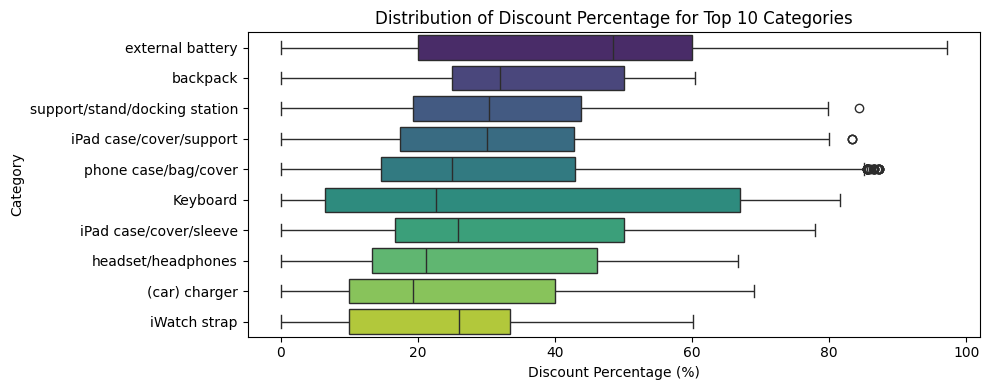

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_categories = avg_discount_per_category.head(10).index.tolist()

df_to_plot = merged_orders_products_filtered[merged_orders_products_filtered['category'].isin(top_10_categories)].copy()

plt.figure(figsize=(10, 4))
sns.boxplot(x='Discount%', y='category', data=df_to_plot, palette='viridis', order=top_10_categories)
plt.title('Distribution of Discount Percentage for Top 10 Categories')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig("Discount percentage for most expensive items.png")

In [ ]:
category_discount_count = category_discount_count.sort_values(ascending=False)
category_discount_count

,,product_quantity
category,Discount_status,
phone case/bag/cover,Discounted,4494
HDD,Discounted,4018
health monitor,Discounted,3497
RAM,Discounted,3481
internal SSD/HDD,Discounted,2778
headset/headphones,Discounted,2464
SSD,Discounted,2261
adapter,Discounted,1983
Apple i Phone,Discounted,1779


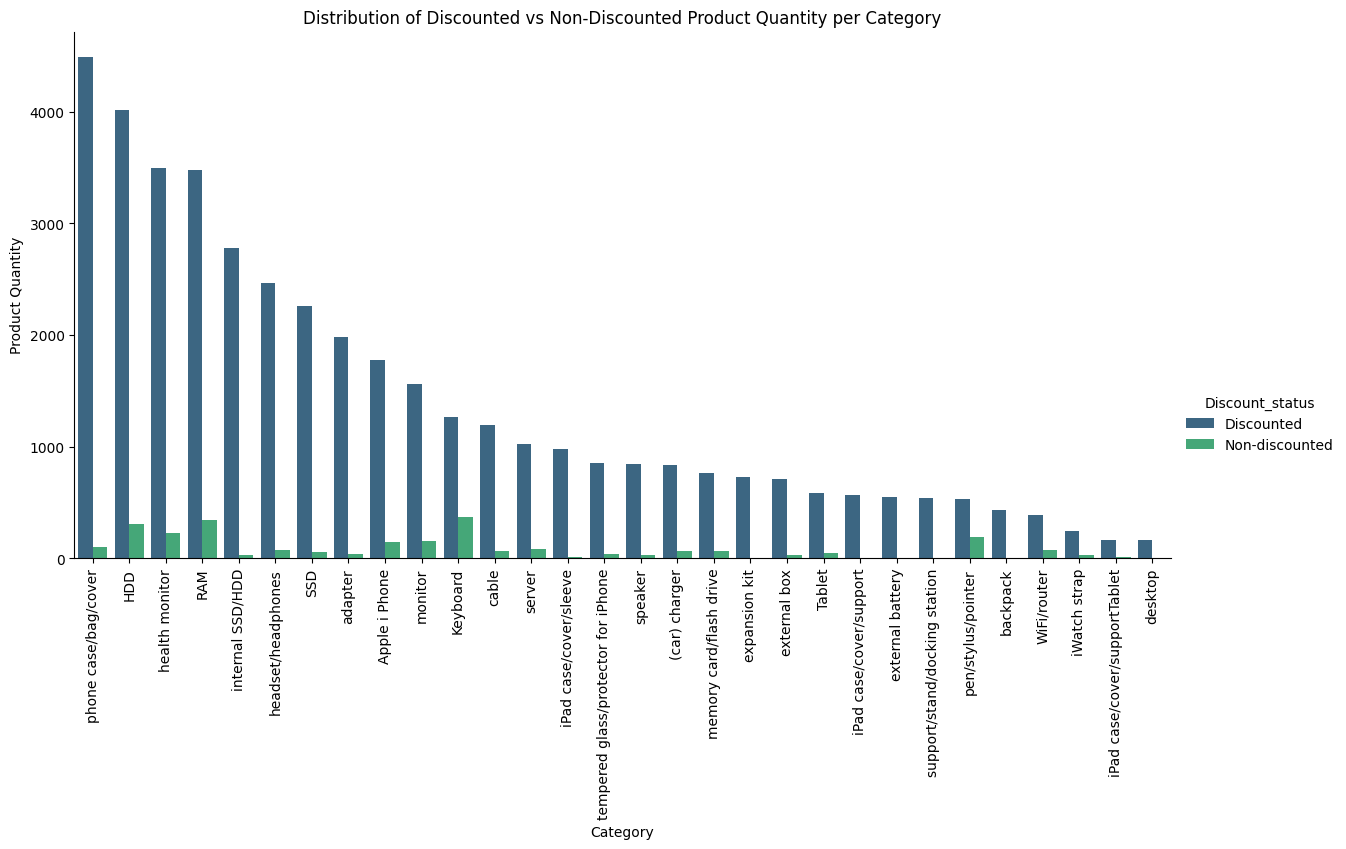

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_discount_df = pd.DataFrame(category_discount_count).reset_index()
# Plot the data using sns.catplot
sns.catplot(kind="bar", data=category_discount_df, x='category', y='product_quantity', hue='Discount_status', palette='viridis', height=6, aspect=2) # Added height and aspect for better visualization
plt.title('Distribution of Discounted vs Non-Discounted Product Quantity per Category')
plt.xlabel('Category')
plt.ylabel('Product Quantity')
plt.xticks(rotation=90)
plt.savefig("Distribution of Product Quantity.png", bbox_inches='tight') # Added bbox_inches='tight'

Out of 40 categories, we further included only a bunch of categories that have product quantity>50, and excluding categories with Discount < 0 and others category

In [ ]:
merged_orders_products['total_sale_price'] = (merged_orders_products['unit_price'] * merged_orders_products['product_quantity'])
merged_orders_products.info()
excluded_categories = ['Other', 'repair service']
nogoproducts_df = merged_orders_products[~merged_orders_products['category'].isin(excluded_categories)].copy()
top20revenue_by_category = nogoproducts_df.groupby('category')['total_sale_price'].sum().sort_values(ascending=False).head(20).reset_index()
top20revenue_by_category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          39161 non-null  int64         
 1   created_date      39161 non-null  datetime64[ns]
 2   total_paid        39161 non-null  float64       
 3   state             39161 non-null  object        
 4   sku               39161 non-null  object        
 5   name              39161 non-null  object        
 6   desc              39161 non-null  object        
 7   price             39161 non-null  float64       
 8   in_stock          39161 non-null  int64         
 9   type              39152 non-null  object        
 10  category          39161 non-null  object        
 11  id                39161 non-null  int64         
 12  id_order          39161 non-null  int64         
 13  product_id        39161 non-null  int64         
 14  product_quantity  3916

,category,total_sale_price
0,Apple i Phone,1106808.98
1,HDD,738576.55
2,monitor,656947.12
3,server,460434.85
4,SSD,451277.53
5,RAM,387748.96
6,internal SSD/HDD,385262.34
7,Tablet,360545.08
8,health monitor,284288.31
9,headset/headphones,257855.65


In [ ]:
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

#Timeline Plot of Order Counts per Month
orders_df['year_month'] = orders_df['created_date'].dt.to_period('M')

orders_df['year_month']

,year_month
0,2017-11
1,2017-12
2,2017-02
3,2017-06
4,2017-01
...,...
40980,2018-03
40981,2018-03
40982,2018-03
40983,2018-03


In [ ]:
#This counts unique order IDs per month.
monthly_order_counts = orders_df.groupby('year_month').agg(order_count=('order_id', 'nunique')).reset_index()
monthly_order_counts

,year_month,order_count
0,2017-01,4597
1,2017-02,2045
2,2017-03,163
3,2017-04,1460
4,2017-05,1651
5,2017-06,1329
6,2017-07,3074
7,2017-08,2098
8,2017-09,1880
9,2017-10,2768


In [ ]:
monthly_revenue = orders_df.groupby('year_month')['total_paid'].sum().reset_index()
monthly_revenue

,year_month,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28
5,2017-06,292248.33
6,2017-07,610519.07
7,2017-08,385907.56
8,2017-09,395974.90
9,2017-10,558111.08


In [ ]:
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)
monthly_order_counts['year_month'] = monthly_order_counts['year_month'].astype(str)

In [ ]:
monthly_statusquo = pd.merge(monthly_revenue, monthly_order_counts, on="year_month")
monthly_statusquo

,year_month,total_paid,order_count
0,2017-01,620623.31,4597
1,2017-02,341848.26,2045
2,2017-03,24976.81,163
3,2017-04,230994.54,1460
4,2017-05,333930.28,1651
5,2017-06,292248.33,1329
6,2017-07,610519.07,3074
7,2017-08,385907.56,2098
8,2017-09,395974.90,1880
9,2017-10,558111.08,2768


In [ ]:
monthly_order_counts.info() , monthly_revenue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year_month   15 non-null     object
 1   order_count  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  15 non-null     object 
 1   total_paid  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


(None, None)

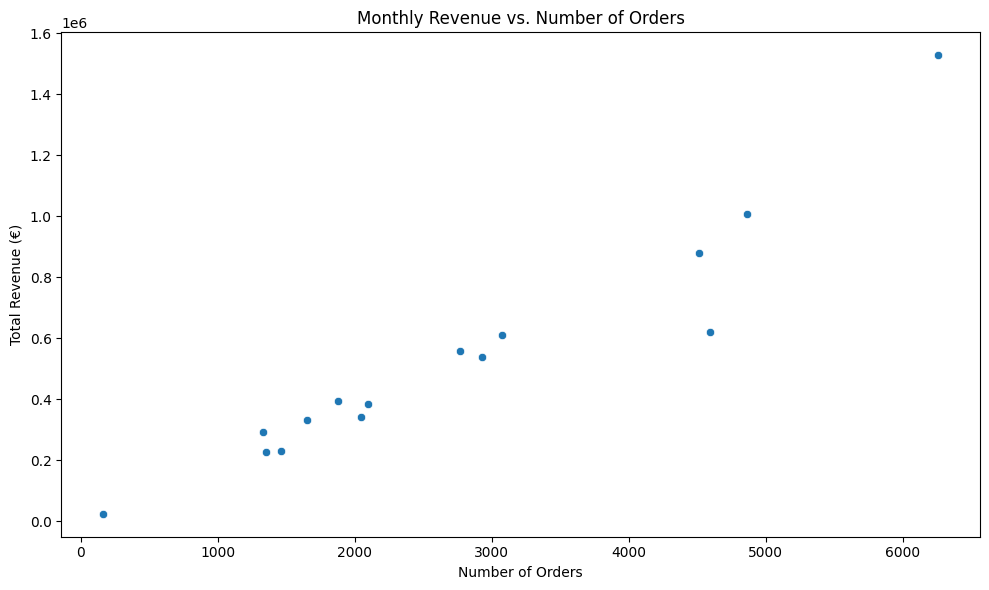

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_statusquo["year_month"] = monthly_statusquo["year_month"].astype(str)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_statusquo, x='order_count', y='total_paid')
plt.title('Monthly Revenue vs. Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Revenue (€)')
plt.tight_layout()
plt.show()

In [ ]:
total_revenue = top20revenue_by_category['total_sale_price'].sum()
top20revenue_by_category['Percentage_Contribution'] = (top20revenue_by_category['total_sale_price'] / total_revenue) * 100
top20revenue_by_category


,category,total_sale_price,Percentage_Contribution
0,Apple i Phone,1106808.98,18.07
1,HDD,738576.55,12.06
2,monitor,656947.12,10.73
3,server,460434.85,7.52
4,SSD,451277.53,7.37
5,RAM,387748.96,6.33
6,internal SSD/HDD,385262.34,6.29
7,Tablet,360545.08,5.89
8,health monitor,284288.31,4.64
9,headset/headphones,257855.65,4.21


In [ ]:
grouped = merged_orders_products.groupby('Discount_status')['total_sale_price'].sum()
grouped

,total_sale_price
Discount_status,
Discounted,5908020.71
Non-discounted,454070.11


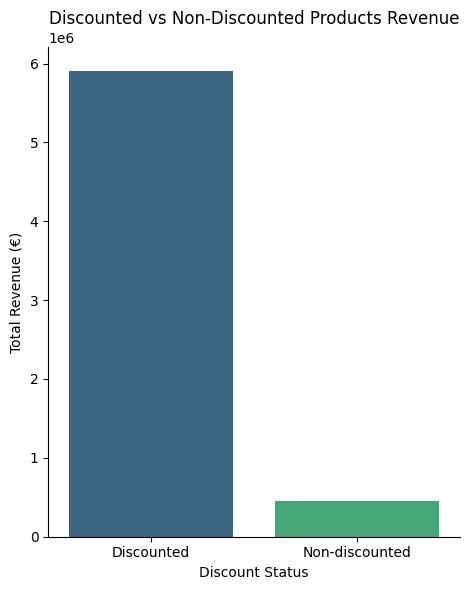

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Series to a DataFrame
grouped_df = grouped.reset_index()
grouped_df.columns = ['Discount_status', 'Total Revenue']

sns.catplot(kind='bar', data=grouped_df, x='Discount_status', y='Total Revenue', palette='viridis', height=6, aspect=0.8)
plt.title('Discounted vs Non-Discounted Products Revenue')
plt.xlabel('Discount Status')
plt.ylabel('Total Revenue (€)')
plt.tight_layout()
plt.savefig("Revenue generated.png")

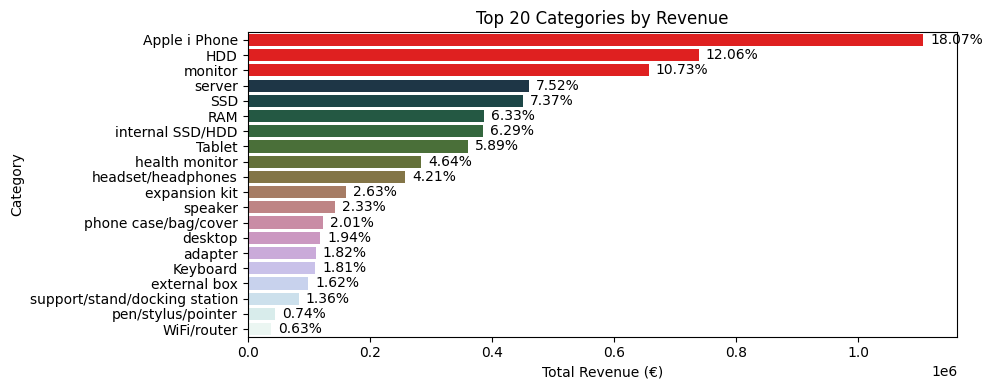

In [ ]:
#% of contribution
# Create a color list to highlight the top 3
num_categories = len(top20revenue_by_category)
colors = ['red' if i < 3 else sns.color_palette('cubehelix', num_categories)[i] for i in range(num_categories)]

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=top20revenue_by_category, y='category', x='total_sale_price', palette=colors)
total = top20revenue_by_category['total_sale_price'].sum()
# Adjust rotation of x-axis labels
plt.xticks(rotation=0, ha='center') # Changed rotation to 0 and horizontal alignment to center
plt.title("Top 20 Categories by Revenue")
plt.ylabel("Category")
plt.xlabel("Total Revenue (€)")

for i,p in enumerate(ax.patches):
    percentage = '{:.2f}%'.format(top20revenue_by_category['Percentage_Contribution'].iloc[i]) # Format to 2 decimal places
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2.
    ax.annotate(
        percentage,
        (x, y),
        ha='left', va='center',
        xytext=(5, 0), # Adjust text position slightly to the right of the bar
        textcoords='offset points',
        color="black", fontsize=10 # Changed text color to black for better visibility
    )
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.savefig("Top 20 Categories by Revenue.png");

In [ ]:
merged_orders_products['Discount'] = merged_orders_products['price'] - merged_orders_products['unit_price']

In [ ]:
# Use the original orders_qu DataFrame which contains 'order_id'
first_purchase_date = orders_qu.groupby('order_id')['created_date'].min().reset_index()

In [ ]:
order_discount_sum = merged_orders_products.groupby('order_id')['Discount'].sum().reset_index()
order_discount_with_purchase_date = order_discount_sum.merge(first_purchase_date, on='order_id')
order_discount_with_purchase_date


,order_id,Discount,created_date
0,241423,10.83,2017-11-06 13:10:02
1,242832,7.22,2017-12-31 17:40:03
2,243330,22.00,2017-02-16 10:59:38
3,245275,30.00,2017-06-28 11:35:37
4,245595,50.96,2017-01-21 12:52:47
...,...,...,...
31902,527024,21.01,2018-03-14 11:39:58
31903,527033,21.01,2018-03-14 11:43:53
31904,527034,21.01,2018-03-14 11:44:55
31905,527036,21.01,2018-03-14 11:47:22


In [ ]:
order_discount_sum['discount_status'] = order_discount_sum['Discount'].apply(lambda x: 'Discounted' if x > 0 else 'Non-Discounted')

# Merge the discount status with the merged orders and orderlines data
merged_orders_discount_status = merged_orders_products.merge(order_discount_sum[['order_id', 'discount_status']], on='order_id')

# Convert 'date' column to datetime
merged_orders_discount_status['date'] = pd.to_datetime(merged_orders_discount_status['date'])

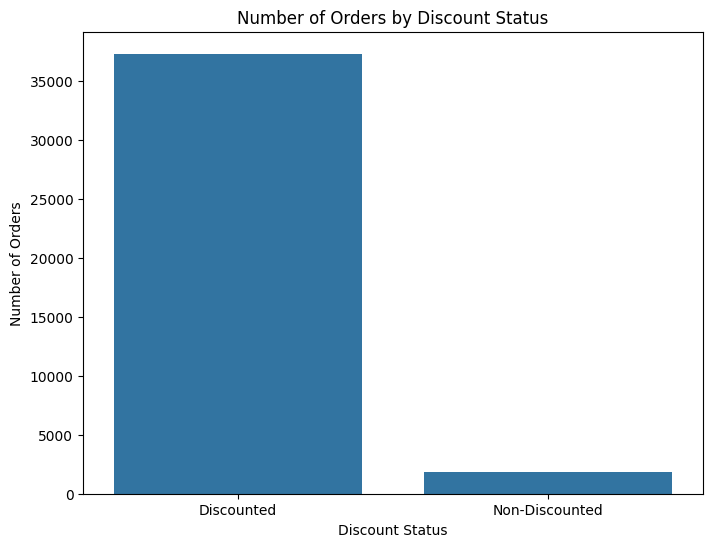

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='discount_status', data=merged_orders_discount_status)
plt.title('Number of Orders by Discount Status')
plt.xlabel('Discount Status')
plt.ylabel('Number of Orders')
plt.savefig("Number of Orders by Discount Status.png");

# ***Discounts*** for Christmas and Black Friday

In [ ]:
# Ensure 'created_date' in orders_qu is in datetime format
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

# Calculate average total_paid per week using groupby with weekly period
avg_order_price_week = orders_qu.groupby(orders_qu['created_date'].dt.to_period('W')).agg({'total_paid': 'mean'}).reset_index()

# Convert the weekly period back to timestamp for plotting or further analysis
avg_order_price_week['created_date'] = avg_order_price_week['created_date'].dt.to_timestamp()

avg_order_price_week

,created_date,total_paid
0,2016-12-26,174.87
1,2017-01-02,127.69
2,2017-01-09,127.42
3,2017-01-16,136.73
4,2017-01-23,133.86
5,2017-01-30,163.90
6,2017-02-06,167.03
7,2017-02-13,173.57
8,2017-02-20,162.59
9,2017-02-27,115.34


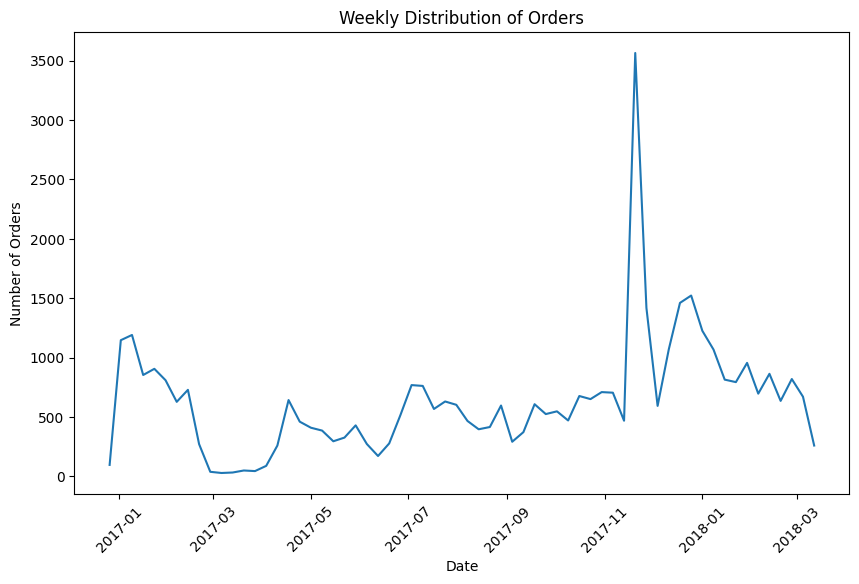

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'created_date' in orders_qu is in datetime format
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

# Calculate the number of orders per week
orders_by_week = orders_qu.groupby(orders_qu['created_date'].dt.to_period('W')).size().reset_index(name='order_count')

# Convert the weekly period back to timestamp for plotting
orders_by_week['created_date'] = orders_by_week['created_date'].dt.to_timestamp()

# Create a line plot for the weekly order distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=orders_by_week, x='created_date', y='order_count')
plt.title('Weekly Distribution of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.savefig("Weekly distribution of orders.png")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'created_date' in orders_qu is in datetime format and set it as the index
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])
orders_qu_indexed = orders_qu.set_index('created_date')

# Calculate average total_paid per week using resample
avg_order_price_week = orders_qu_indexed.resample('W').agg({'total_paid': 'mean'}).reset_index()

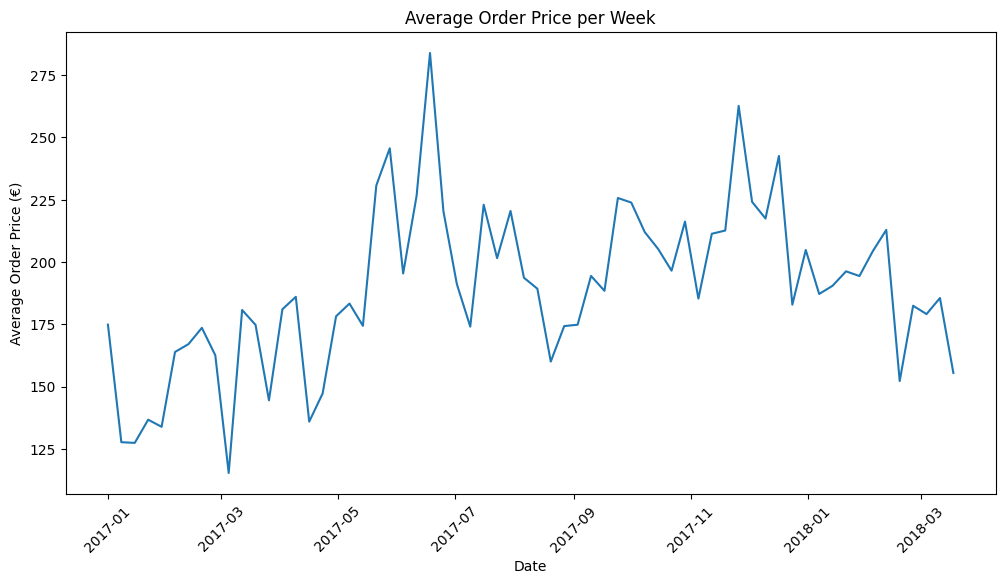

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for average order price by week
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_order_price_week, x='created_date', y='total_paid')
plt.title('Average Order Price per Week')
plt.xlabel('Date')
plt.ylabel('Average Order Price (€)')
plt.xticks(rotation=45)
plt.show()

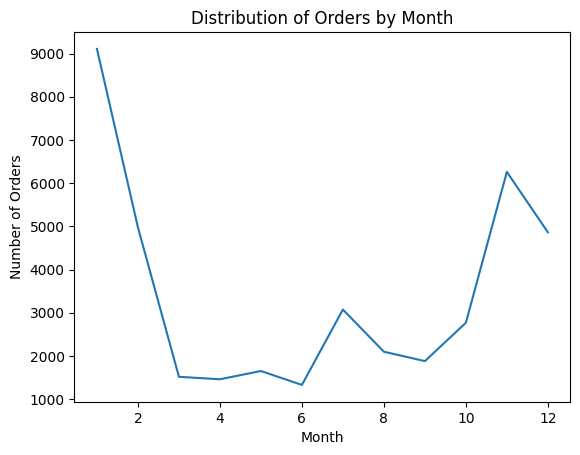

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

orders_qu['month'] = orders_qu['created_date'].dt.month

orders_by_month = orders_qu['month'].value_counts().sort_index()

sns.lineplot(x=orders_by_month.index, y=orders_by_month.values)
plt.title('Distribution of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.savefig("Distribution of Monthly orders.png");

Black Friday (November 2017):
Orders spike sharply — 31,774 orders, nearly 3× higher than most months. Revenue also jumps to about €2.95M, the highest of the year.

Christmas (December 2017):
Sales remain strong — 25,167 orders and about €1.9M in revenue, still well above average months.

Regular months (e.g., March–May 2017):
Much lower activity, around 9,000–12,000 orders and revenue typically between €0.5M–0.7M

In [ ]:
# Filter for orders in November and December 2017
black_friday_christmas_orders = merged_orders_products[
    (merged_orders_products['created_date'].dt.year == 2017) &
    (merged_orders_products['created_date'].dt.month.isin([11, 12]))
].copy()

black_friday_christmas_orders

,order_id,created_date,total_paid,state,sku,name,desc,price,in_stock,type,...,id,id_order,product_id,product_quantity,unit_price,date,Discount,Discount_status,Discount%,total_sale_price
0,241423,2017-11-06 13:10:02,136.15,Completed,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,...,1398738,241423,0,1,129.16,2017-11-06 12:47:20,10.83,Discounted,7.74,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,17.99,0,11905404,...,1529178,242832,0,1,10.77,2017-12-31 17:26:40,7.22,Discounted,40.13,10.77
22,256679,2017-11-26 10:43:04,20.58,Completed,MUV0194,Stand Folio Case Muvit iPhone X Black,Soft touch case with cover for iPhone X,17.95,1,11865403,...,1450478,256679,0,1,13.59,2017-11-26 10:38:12,4.36,Discounted,24.29,13.59
24,257280,2017-12-20 14:49:52,260.00,Completed,BNQ0064,"GW2765HE BenQ Monitor 27 ""QHD DP HDMI",Monitor BenQ 27-inch IPS panel for your Mac,299.90,0,1296,...,1507643,257280,0,1,260.00,2017-12-20 14:16:59,39.90,Discounted,13.30,260.00
28,259192,2017-11-09 11:15:51,195.74,Completed,SEA0039,"Seagate Barracuda 2TB 35 ""SATA hard drive Mac ...",Internal Hard Drive 2TB Mac and PC (ST2000DM006),89.99,1,12655397,...,1401175,259192,0,2,70.58,2017-11-09 10:45:29,19.41,Discounted,21.57,141.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30889,478292,2017-12-31 23:38:02,487.96,Completed,CRU0051,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,...,1529532,478292,0,1,121.90,2017-12-31 23:24:05,36.76,Discounted,23.17,121.90
30890,478292,2017-12-31 23:38:02,487.96,Completed,SAN0181,Sandisk Extreme Memory Card v30 microSDXC 64GB...,MicroSDXC memory card 64GB UHS Class 3 v30 spe...,49.99,0,57445397,...,1529504,478292,0,1,42.28,2017-12-31 22:23:31,7.71,Discounted,15.42,42.28
30891,478292,2017-12-31 23:38:02,487.96,Completed,GOP0099,GoPro Hero 5 Black,GoPro action camera with 4K resolution submers...,329.99,0,11905404,...,1529499,478292,0,1,316.79,2017-12-31 22:13:31,13.20,Discounted,4.00,316.79
30892,478293,2017-12-31 22:18:32,28.23,Completed,MOS0144,Moshi iGlaze iPhone 6 Plus Lila,Rigid shell shock protection and rasguÌ ± os f...,35.00,0,11865403,...,1529501,478293,0,1,21.24,2017-12-31 22:17:38,13.76,Discounted,39.31,21.24


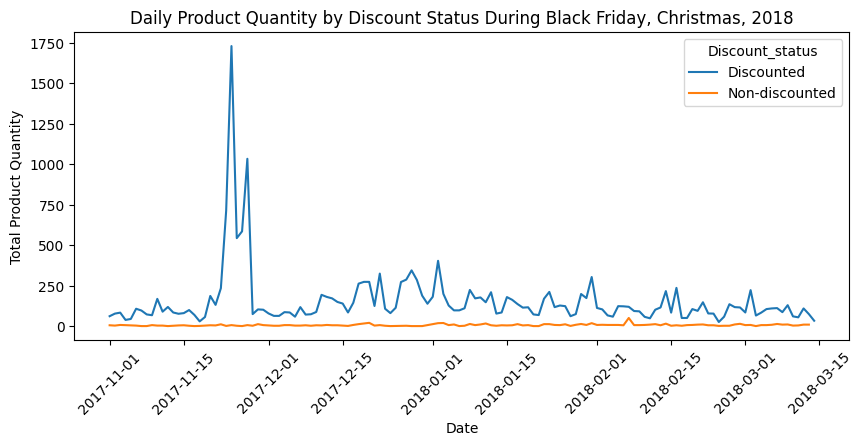

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for orders in November and December 2017, and January, February, and March 2018
black_friday_christmas_orders = merged_orders_products[
    ((merged_orders_products['created_date'].dt.year == 2017) &
     (merged_orders_products['created_date'].dt.month.isin([11, 12]))) |
    ((merged_orders_products['created_date'].dt.year == 2018) &
     (merged_orders_products['created_date'].dt.month.isin([1, 2, 3])))
].copy()

black_friday_christmas_orders['created_date'] = pd.to_datetime(black_friday_christmas_orders['created_date'])

# Group by date and discount status, and sum product quantity
daily_purchase_trends_bf = black_friday_christmas_orders.groupby([black_friday_christmas_orders['created_date'].dt.date, 'Discount_status'])['product_quantity'].sum().reset_index()

# Convert 'created_date' back to datetime for plotting
daily_purchase_trends_bf['created_analysis_date'] = pd.to_datetime(daily_purchase_trends_bf['created_date'])

plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_purchase_trends_bf, x='created_date', y='product_quantity', hue='Discount_status')
plt.title('Daily Product Quantity by Discount Status During Black Friday, Christmas, 2018')
plt.xlabel('Date')
plt.ylabel('Total Product Quantity')
plt.xticks(rotation=45)
plt.savefig("Product quantity by Discount Status.png", bbox_inches='tight')

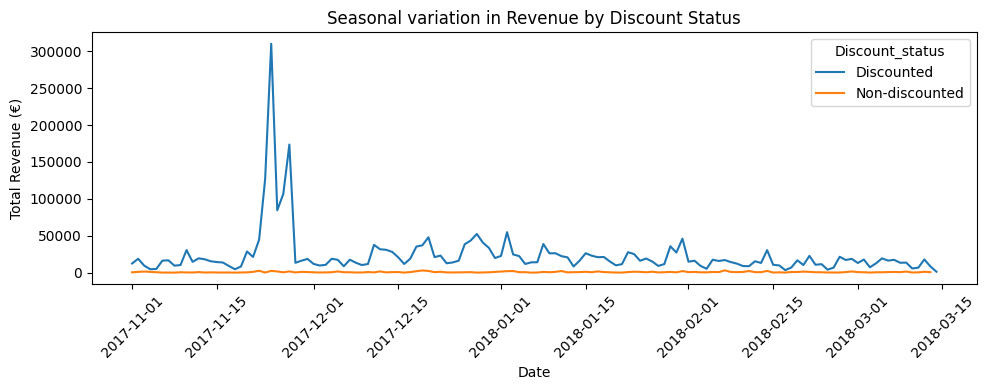

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for orders in November and December 2017 (Black Friday and Christmas months) and Q1 2018
black_friday_christmas_orders = merged_orders_products[
    ((merged_orders_products['created_date'].dt.year == 2017) &
     (merged_orders_products['created_date'].dt.month.isin([11, 12]))) |
    ((merged_orders_products['created_date'].dt.year == 2018) &
     (merged_orders_products['created_date'].dt.month.isin([1, 2, 3])))
].copy()


# Ensure 'created_date' is in datetime format
black_friday_christmas_orders['created_date'] = pd.to_datetime(black_friday_christmas_orders['created_date'])

# Group by date and discount status, and sum the total_sale_price
daily_revenue_bfcm_discount_status = black_friday_christmas_orders.groupby([black_friday_christmas_orders['created_date'].dt.date, 'Discount_status'])['total_sale_price'].sum().reset_index()

# Convert 'created_date' back to datetime for plotting
daily_revenue_bfcm_discount_status['created_date'] = pd.to_datetime(daily_revenue_bfcm_discount_status['created_date'])

# Create the line plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_revenue_bfcm_discount_status, x=daily_revenue_bfcm_discount_status['created_date'], y='total_sale_price', hue='Discount_status')
plt.title('Seasonal variation in Revenue by Discount Status')
plt.xlabel('Date')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.savefig("Total Revenue during black friday and christmas", bbox_inches='tight') # Added bbox_inches='tight'

In [ ]:
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

In [ ]:
merged_orders_products['year_month'] = merged_orders_products['created_date'].dt.to_period('M')
merged_orders_products['name'].head(5)

,name
0,LaCie Porsche Design Desktop Drive 4TB USB 3.0...
1,Parrot 550mAh battery for MiniDrones
2,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM
3,Tado Smart Climate Control Intelligent AC
4,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA..."


In [ ]:
merged_orders_products.loc[merged_orders_products['created_date'].dt.year == 2017, 'month'] = 'December'
merged_orders_products.loc[merged_orders_products['created_date'].dt.year == 2018, 'month'] = 'January'

In [ ]:
merged_orders_products['year_month'] = merged_orders_products['created_date'].dt.to_period('M')

In [ ]:
merged_orders_products['year_month']

,year_month
0,2017-11
1,2017-12
2,2017-02
3,2017-06
4,2017-01
...,...
39156,2018-03
39157,2018-03
39158,2018-03
39159,2018-03


In [ ]:
monthly_order_count = merged_orders_products.groupby('year_month').agg(order_count=('order_id', 'nunique')).reset_index()
monthly_order_count

,year_month,order_count
0,2017-01,3412
1,2017-02,1554
2,2017-03,129
3,2017-04,1026
4,2017-05,1333
5,2017-06,1055
6,2017-07,2452
7,2017-08,1689
8,2017-09,1455
9,2017-10,2080


In [ ]:
monthly_revenue = merged_orders_products.groupby('year_month')['total_paid'].sum().reset_index()
monthly_revenue

,year_month,total_paid
0,2017-01,749943.21
1,2017-02,413228.33
2,2017-03,30176.78
3,2017-04,272607.67
4,2017-05,389250.38
5,2017-06,367657.88
6,2017-07,732115.56
7,2017-08,452737.83
8,2017-09,461283.64
9,2017-10,643177.93


In [ ]:
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)
monthly_order_count['year_month'] = monthly_order_count['year_month'].astype(str)

In [ ]:
monthly_statusquo = pd.merge(monthly_revenue, monthly_order_count, on="year_month")
monthly_statusquo.head(5)

,year_month,total_paid,order_count
0,2017-01,749943.21,3412
1,2017-02,413228.33,1554
2,2017-03,30176.78,129
3,2017-04,272607.67,1026
4,2017-05,389250.38,1333


In [ ]:
#we convert datetime to string for ease of filtering and plotting
monthly_statusquo["year_month"] = monthly_statusquo["year_month"].astype(str)

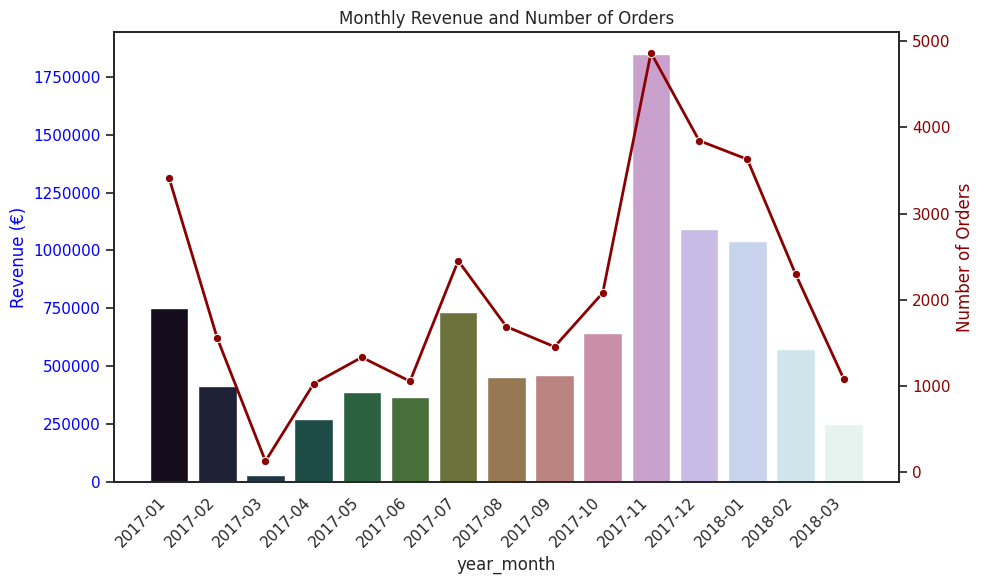

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

fig_monthlyrevenueorder, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for revenue on 1st y-axis
Monthly_Revenue_Number_Orders_plot=sns.barplot(data=monthly_statusquo, x="year_month", y="total_paid", ax=ax1, hue="year_month",palette="cubehelix")
ax1.set_ylabel("Revenue (€)", color="blue")
ax1.ticklabel_format(style='plain', axis='y')
ax1.tick_params(axis='y', labelcolor="blue")

# Line plot for number of orders on a 2nd y-axis
ax2 = ax1.twinx()
sns.lineplot(data=monthly_statusquo, x="year_month", y="order_count", ax=ax2, color="darkred", marker="o", linewidth=2)
ax2.set_ylabel("Number of Orders", color="darkred")
ax2.tick_params(axis='y', labelcolor="darkred")

# Final plotting
plt.title("Monthly Revenue and Number of Orders")
for ax in [ax1, ax2]: ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.savefig("Monthly Revenue & No.of orders.png",bbox_inches='tight')

In [ ]:
# Save the figure to a PNG file
fig_monthlyrevenueorder.savefig("Monthly_Revenue_Number_Orders_plot.png")

# Download the file in Google Colab
from google.colab import files
files.download("Monthly_Revenue_Number_Orders_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#How large are the discounts typically offered on products?"

In [ ]:
nogoproducts_df.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(nogoproducts_df['discount%'], bins=30, color='gray', kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("Distribution_of_Discount_Percentages_plot.png", dpi=300)
plt.show()

In [ ]:
#Distribution_of_Discount_Percentages_plot.savefig("Distribution_of_Discount_Percentages_plot.png", dpi=300)

from google.colab import files
files.download("Distribution_of_Discount_Percentages_plot.png")

#Do higher discounts in a category lead to more total revenue?

In [ ]:
merged_orders_products["discount%"] = ((merged_orders_products["Discount"]/merged_orders_products["price"])*100).round(2)

In [ ]:
category_summary = merged_orders_products.groupby('category').agg({'discount%': 'mean','total_sale_price': 'sum'}).reset_index()

In [ ]:
category_summary.columns = ['Category', 'Avg_Discount_Rate', 'Total_Revenue']

In [ ]:
category_summary = category_summary.sort_values(by='Total_Revenue', ascending=False)

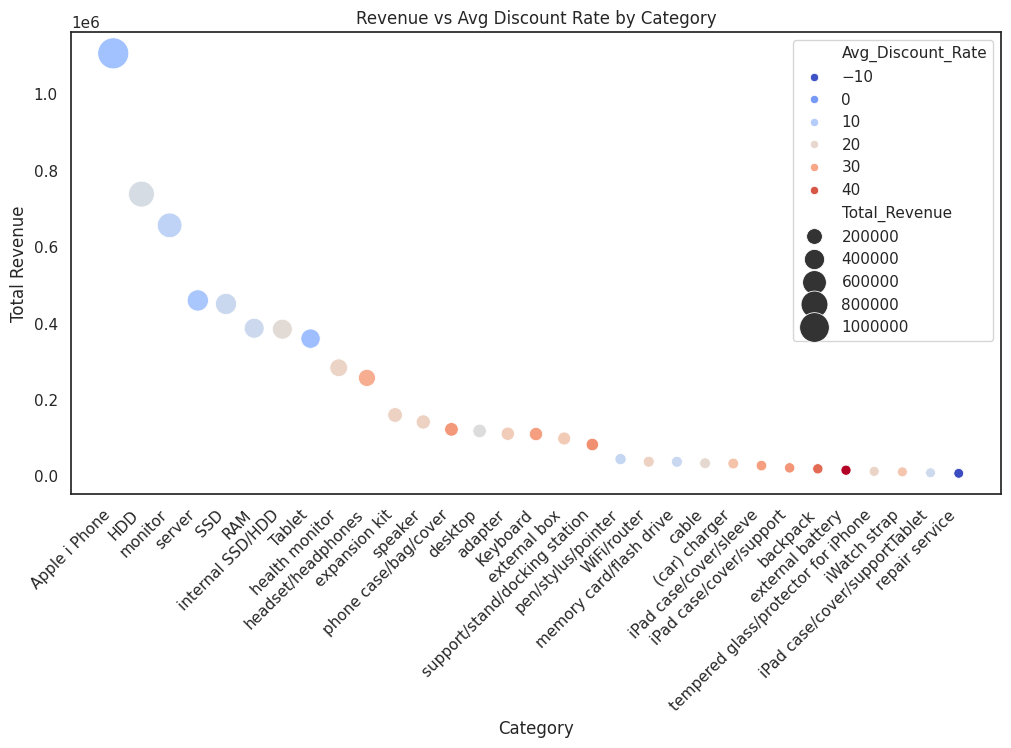

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
figsize=(10, 6)
Revenue_AvgDiscountRate_byCategory_plot =plt.figure(figsize=(12,6))
sns.scatterplot(data=category_summary, x='Category',y='Total_Revenue',size='Total_Revenue',hue='Avg_Discount_Rate',palette='coolwarm',sizes=(50, 500), legend='brief')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue")
plt.title("Revenue vs Avg Discount Rate by Category")
plt.savefig("Revenue vs Avg Discount rate.png",bbox_inches='tight');

In [ ]:
# Save the figure to a PNG file
Revenue_AvgDiscountRate_byCategory_plot.savefig("Revenue_AvgDiscountRate_byCategory_plot.png")

# Download the file in Google Colab
from google.colab import files
files.download("Revenue_AvgDiscountRate_byCategory_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_orders_products['date'] = pd.to_datetime(merged_orders_products['date'])

In [ ]:
monthly_revenue_by_discount = merged_orders_products.groupby(['year_month', 'Discount_status'])['total_sale_price'].sum().reset_index()
monthly_revenue_by_discount

,year_month,Discount_status,total_sale_price
0,2017-01,Discounted,421632.02
1,2017-01,Non-discounted,75458.25
2,2017-02,Discounted,241092.40
3,2017-02,Non-discounted,43713.51
4,2017-03,Discounted,14968.31
5,2017-03,Non-discounted,6217.37
6,2017-04,Discounted,169912.67
7,2017-04,Non-discounted,18148.30
8,2017-05,Discounted,232976.50
9,2017-05,Non-discounted,43521.92


In [ ]:
# Create the 'year_month' column in nogoproducts_df
nogoproducts_df['year_month'] = nogoproducts_df['created_date'].dt.to_period('M')

monthly_profit = (nogoproducts_df.groupby(['year_month', 'Discount_status']).agg(total_sale_price=('total_sale_price', 'sum'),total_discount_given=('Discount', 'sum'))).reset_index()
monthly_profit

,year_month,Discount_status,total_sale_price,total_discount_given
0,2017-01,Discounted,421412.44,109986.64
1,2017-01,Non-discounted,74938.67,-6840.65
2,2017-02,Discounted,241032.50,47865.08
3,2017-02,Non-discounted,43553.61,-3599.75
4,2017-03,Discounted,14968.31,2767.81
5,2017-03,Non-discounted,5967.40,-289.32
6,2017-04,Discounted,169912.67,24701.23
7,2017-04,Non-discounted,17468.37,-1132.19
8,2017-05,Discounted,232976.50,32550.42
9,2017-05,Non-discounted,42931.99,-2781.37


#What is the distribution of product prices across different categories?

In [ ]:
#Finds the top 20 most frequent product categories (based on number of products).
top10_categories = nogoproducts_df['category'].value_counts().head(10).index

In [ ]:
plt.figure(figsize=(14, 9))
sns.boxplot(
    data=nogoproducts_df[nogoproducts_df['category'].isin(top10_categories)],
    x='category', y='unit_price', hue='discounted_Y/N'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unit Price (€)')
plt.title('Unit Price Distribution by Discounted Status (Top 10 Categories)')
plt.savefig("Unit_Price_Distribution_Top10_Discounted_vs_NonDiscounted.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

files.download("Unit_Price_Distribution_Top10_Discounted_vs_NonDiscounted.png")

#Profitability Analysis. Does discounting drive profit?

In [ ]:
nogoproducts_df.head()

In [ ]:
nogoproducts_df['date'] = pd.to_datetime(nogoproducts_df['date'])

In [ ]:
nogoproducts_df['year_month'] = nogoproducts_df['date'].dt.to_period('M')

In [ ]:
nogoproducts_df['year_month'] = nogoproducts_df['year_month'].astype(str)

In [ ]:
monthly_profit = (nogoproducts_df.groupby(['year_month', 'discounted_Y/N']).agg(total_sale_price=('total_sale_price', 'sum'),total_discount_given=('total_discount', 'sum'))).reset_index()
monthly_profit

In [ ]:
monthly_profit['estimated_net_gain'] = (monthly_profit['total_sale_price'] - monthly_profit['total_discount_given'])

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit,x='year_month',y='estimated_net_gain',hue='discounted_Y/N',marker='o')
plt.title("Estimated Net Gain Over Time: Discounted vs Non-Discounted")
plt.ylabel("Estimated Net Gain (€)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.savefig("Estimated_Net_Gain_Discounted_vs_Non_Discounted.png", dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download("Estimated_Net_Gain_Discounted_vs_Non_Discounted.png")

#Discount Status Counts & Revenue over time

In [ ]:
nogoproducts_df.info()

In [ ]:
nogoproducts_df['date'] = pd.to_datetime(nogoproducts_df['date'])

In [ ]:
nogoproducts_df['year_month'] = nogoproducts_df['date'].dt.to_period('M')

In [ ]:
monthly_revenue_by_discount = nogoproducts_df.groupby(['year_month', 'discounted_Y/N'])['total_sale_price'].sum().reset_index()
monthly_revenue_by_discount

In [ ]:
#grouping the boolean from discounted_Y/N to labels before plotting
monthly_revenue_by_discount['discounted_Y/N'] = monthly_revenue_by_discount['discounted_Y/N'].map({True: 'Discounted',False:'Not Discounted'})
monthly_revenue_by_discount.info()

In [ ]:
monthly_revenue_by_discount.head()

In [ ]:
monthly_revenue_by_discount['year_month'] = monthly_revenue_by_discount['year_month'].astype(str)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_monthlyrevenuediscountedandnon, ax = plt.subplots(figsize=(12, 6))

Monthly_Revenue_Discounted_NonDiscounted_Products_plot=sns.lineplot(data=monthly_revenue_by_discount, x='year_month', y='total_sale_price', hue='discounted_Y/N',marker='o', palette='cubehelix')

plt.title("Monthly Revenue: Discounted vs Non-Discounted Products")
plt.xlabel("Month")
plt.ylabel("Total Revenue (€)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Product Type")
plt.tight_layout()
plt.show()

In [ ]:
# Save the figure to a PNG file
fig_monthlyrevenuediscountedandnon.savefig("Monthly_Revenue_Discounted_NonDiscounted_Products_plot.png")

# Download the file in Google Colab
from google.colab import files
files.download("Monthly_Revenue_Discounted_NonDiscounted_Products_plot.png")

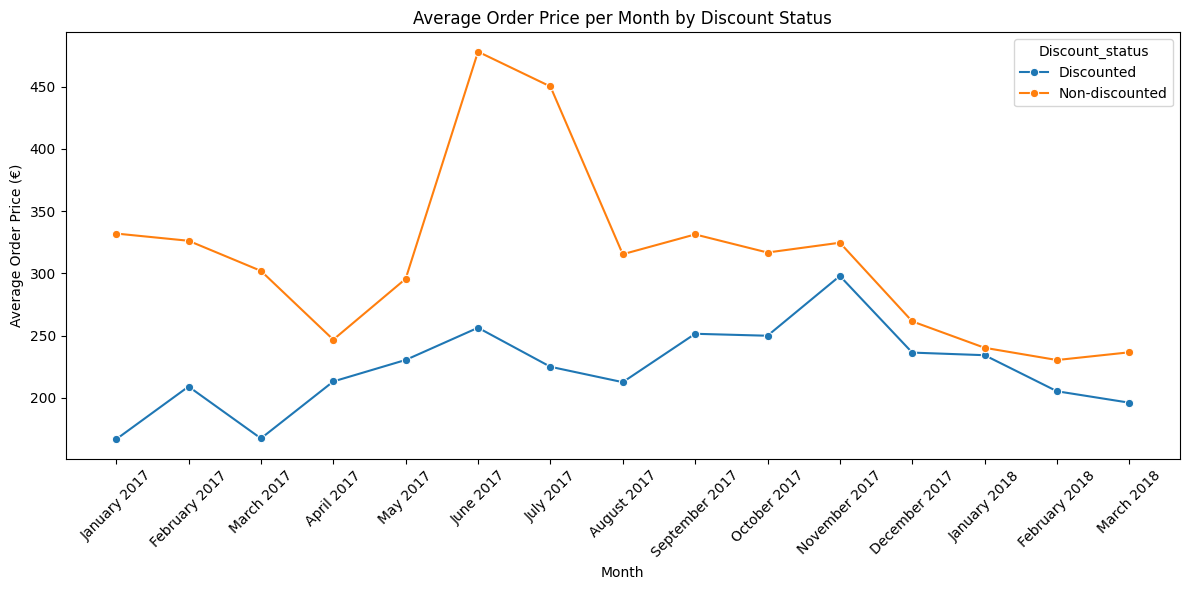

In [ ]:
# Calculate average total_paid per month and discount status
avg_order_price_month_discount = merged_orders_products.groupby([merged_orders_products['created_date'].dt.to_period('M'), 'Discount_status'])['total_paid'].mean().reset_index()

# Convert the monthly period to datetime and extract month names for plotting
avg_order_price_month_discount['created_date'] = avg_order_price_month_discount['created_date'].dt.to_timestamp().dt.strftime('%B %Y')

# Create a line plot for average order price by month and discount status
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_order_price_month_discount, x='created_date', y='total_paid', hue='Discount_status', marker='o')
plt.title('Average Order Price per Month by Discount Status')
plt.xlabel('Month')
plt.ylabel('Average Order Price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Average Order Price per Month by Discount Status.png",bbox_inches='tight')

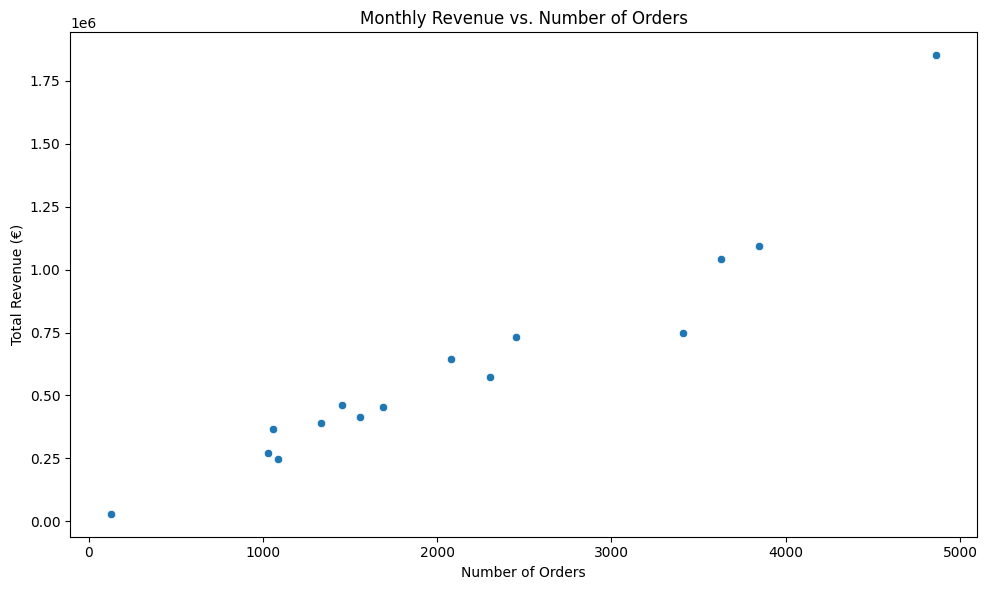

In [ ]:
# Ensure 'created_date' in merged_orders_products is in datetime format
merged_orders_products['created_date'] = pd.to_datetime(merged_orders_products['created_date'])

# Extract year and month
merged_orders_products['year_month'] = merged_orders_products['created_date'].dt.to_period('M')

# Calculate monthly order count and revenue
monthly_order_count = merged_orders_products.groupby('year_month').agg(order_count=('order_id', 'nunique')).reset_index()
monthly_revenue = merged_orders_products.groupby('year_month')['total_paid'].sum().reset_index()

# Convert 'year_month' to string for merging
monthly_order_count['year_month'] = monthly_order_count['year_month'].astype(str)
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

# Merge the monthly data
monthly_statusquo = pd.merge(monthly_revenue, monthly_order_count, on="year_month")

# Generate the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_statusquo, x='order_count', y='total_paid')
plt.title('Monthly Revenue vs. Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Revenue (€)')
plt.tight_layout()
plt.show()